In [1]:
import pandas as pd
dataset=pd.read_csv(" ZOMATO_stock_data.csv", parse_dates=['Date'], index_col='Date')

In [2]:
dataset

,Open,High,Low,Close
Date,,,,
2021-07-23,116.000000,138.899994,115.000000,126.000000
2021-07-26,126.349998,143.750000,125.300003,140.649994
2021-07-27,141.699997,147.800003,127.750000,132.899994
2021-07-28,131.000000,135.000000,123.550003,131.199997
2021-07-29,134.949997,144.000000,132.199997,141.550003
...,...,...,...,...
2021-12-29,132.699997,137.699997,131.550003,137.100006
2021-12-30,137.050003,137.050003,133.300003,133.949997
2021-12-31,133.850006,138.399994,133.399994,137.399994


In [3]:
#Start date and end_date
from datetime import date, timedelta
import pandas as pd
start_date = pd.to_datetime("2021-07-23")
end_date = pd.to_datetime("2021-11-13") - timedelta(days=1) #Excluding last

#List of all dates
all_date = pd.date_range(start_date, end_date, freq='d')

In [4]:
all_date

DatetimeIndex(['2021-07-23', '2021-07-24', '2021-07-25', '2021-07-26',
               '2021-07-27', '2021-07-28', '2021-07-29', '2021-07-30',
               '2021-07-31', '2021-08-01',
               ...
               '2021-11-03', '2021-11-04', '2021-11-05', '2021-11-06',
               '2021-11-07', '2021-11-08', '2021-11-09', '2021-11-10',
               '2021-11-11', '2021-11-12'],
              dtype='datetime64[ns]', length=113, freq='D')

In [5]:
dummyDate=dataset

In [6]:
dummyDate.index=all_date

In [7]:
dummyDate

,Open,High,Low,Close
2021-07-23,116.000000,138.899994,115.000000,126.000000
2021-07-24,126.349998,143.750000,125.300003,140.649994
2021-07-25,141.699997,147.800003,127.750000,132.899994
2021-07-26,131.000000,135.000000,123.550003,131.199997
2021-07-27,134.949997,144.000000,132.199997,141.550003
...,...,...,...,...
2021-11-08,132.699997,137.699997,131.550003,137.100006
2021-11-09,137.050003,137.050003,133.300003,133.949997
2021-11-10,133.850006,138.399994,133.399994,137.399994
2021-11-11,139.699997,142.449997,138.300003,141.350006


In [8]:
#DateIndex.index=pd.to_datetime(dataset["Date"],infer_datetime_format=True)

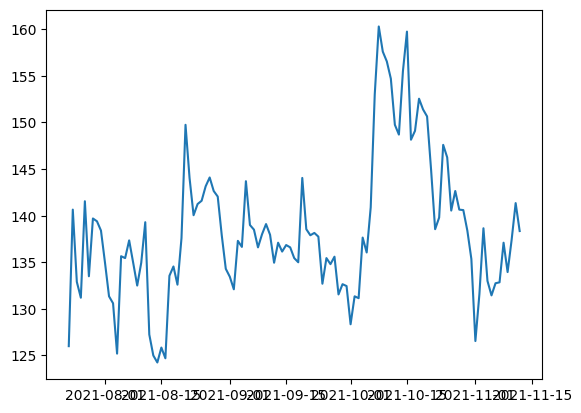

In [9]:
import matplotlib.pyplot as plt
plt.plot(dataset["Close"])

<Figure size 1600x500 with 0 Axes>

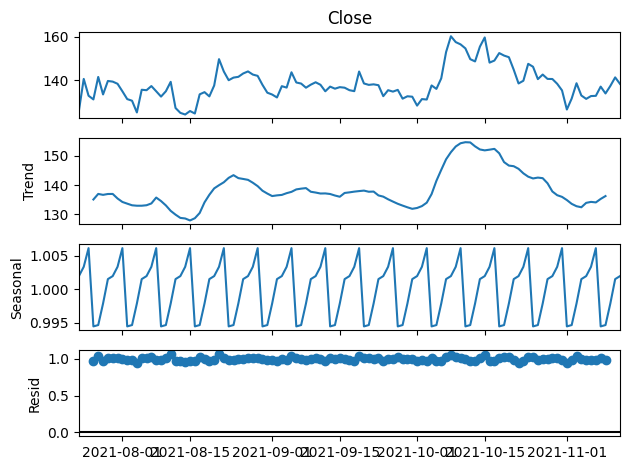

In [10]:
from pandas import read_csv
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(dummyDate["Close"], model='multiplicative')
plt.figure(figsize=(16,5))
result.plot()
plt.show()

<Figure size 1600x500 with 0 Axes>

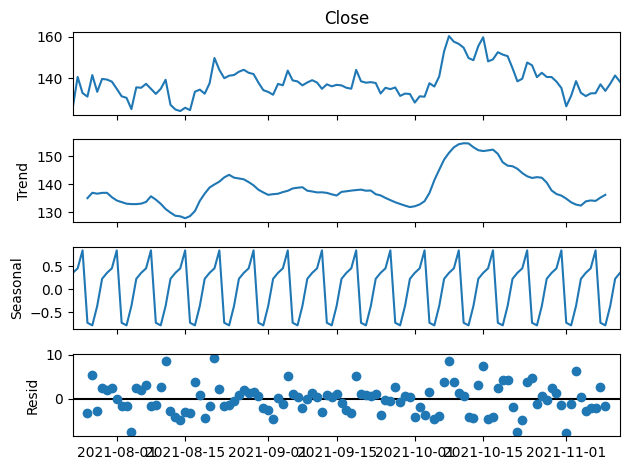

In [11]:
from pandas import read_csv
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(dummyDate["Close"], model='additive')
plt.figure(figsize=(16,5))
result.plot()
plt.show()

In [12]:
# ADF Test
# Function to print out results in customised manner
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries,df,pollutant):
    plt.figure(figsize=(16,5))
    # Plot the data
    # ADF Test
    # Function to print out results in customised manner
    from statsmodels.tsa.stattools import adfuller
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    ans=dfoutput
    print("Condition:")
    print("p-value<=0.05-->Accept Alternate Hypothesis")
    print("p-value>0.05-->Accept Null Hypothesis")
    if(ans['Test Statistic']<ans["Critical Value (1%)"] or ans['Test Statistic']<ans["Critical Value (5%)"] or ans['Test Statistic']<ans["Critical Value (10%)"] and ans["p-value"]<0.05):
        print("Condition: statictic < any critical value and p-value <0.05 to reject null hypothsis")
        print("Reject null hypothesis:Non Stationarity")
        print("Accept Alternate hypothesis:Staionarity ")
        message="Stationarity based on ADH"
    else:
        print("Condition: statictic < any critical value and p-value <0.05 to reject null hypothsis")
        print("Accept null hypothesis:Non Stationarity" )
        print("Reject Alternate hypothesis:Staionarity ")
        message="Non-stationarity based on ADH"
        
    plt.plot(df.index, df[pollutant], label = pollutant)
    plt.legend(loc='best')
    plt.title("{}_{}_2013 to 2021".format(message,pollutant))
    plt.savefig("{}_ADH.png".format(pollutant))
    plt.show()
    
    return message
    
# Call the function and run the test

Results of Dickey-Fuller Test:
Test Statistic                  -3.672673
p-value                          0.004514
#Lags Used                       0.000000
Number of Observations Used    112.000000
Critical Value (1%)             -3.490131
Critical Value (5%)             -2.887712
Critical Value (10%)            -2.580730
dtype: float64
Condition:
p-value<=0.05-->Accept Alternate Hypothesis
p-value>0.05-->Accept Null Hypothesis
Condition: statictic < any critical value and p-value <0.05 to reject null hypothsis
Reject null hypothesis:Non Stationarity
Accept Alternate hypothesis:Staionarity 


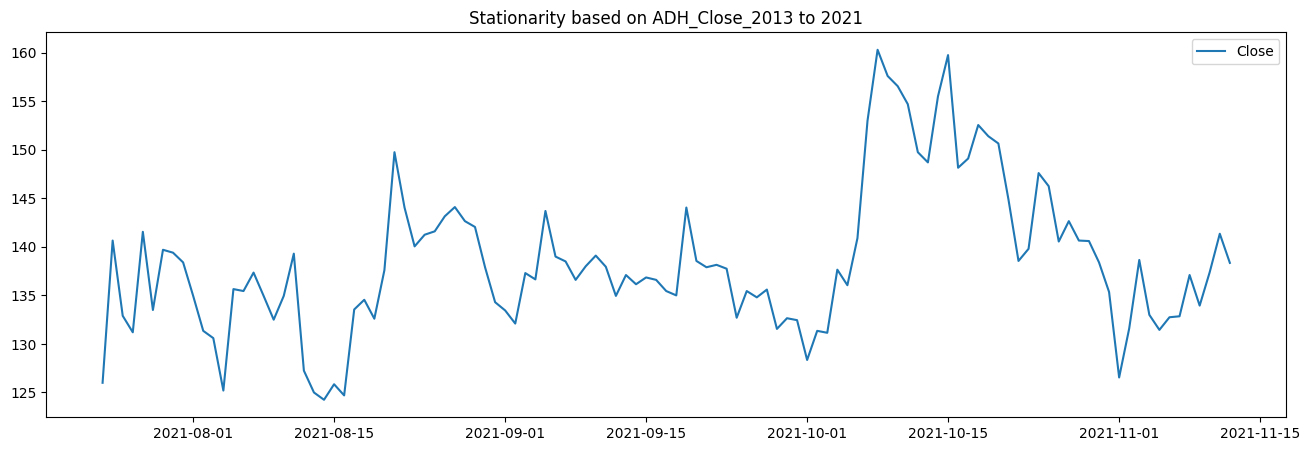

'Stationarity based on ADH'

In [13]:
adf_test(dataset["Close"],dataset,"Close")

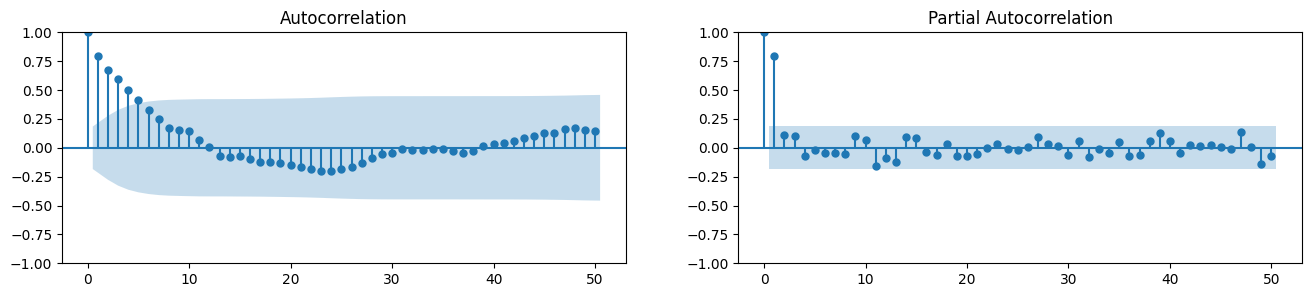

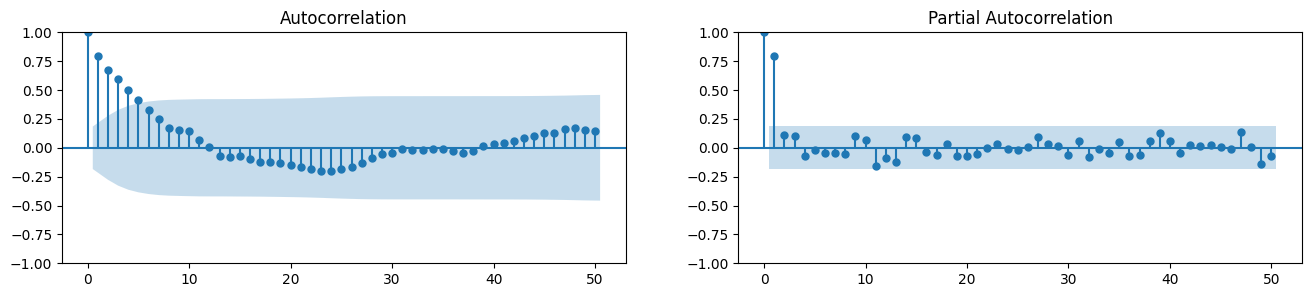

In [14]:
from statsmodels.tsa.stattools import acf, pacf #Autocorrelation Function (ACF)identifying significant lags, and Partial Autocorrelation Function (PACF)removing the effects of shorter lags 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)#1 row, 2 columns,16 units wide and 3 units tall,figure to 100 dots per inch.
plot_acf(dataset.Close.tolist(), lags=50, ax=axes[0])
plot_pacf(dataset.Close.tolist(), lags=50, ax=axes[1])

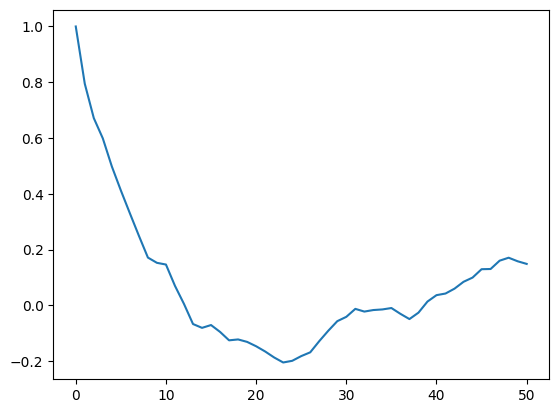

In [15]:
plt.plot(acf(dataset["Close"],nlags=50))

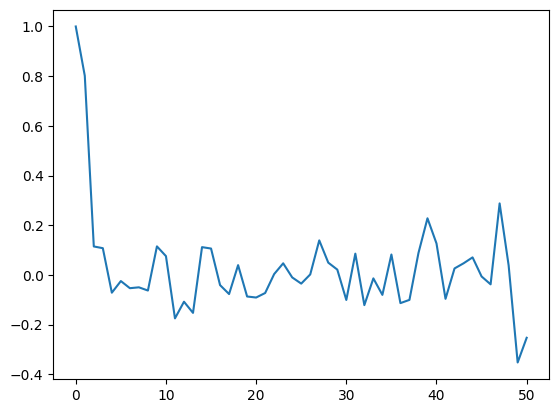

In [16]:
plt.plot(pacf(dataset["Close"],nlags=50))

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

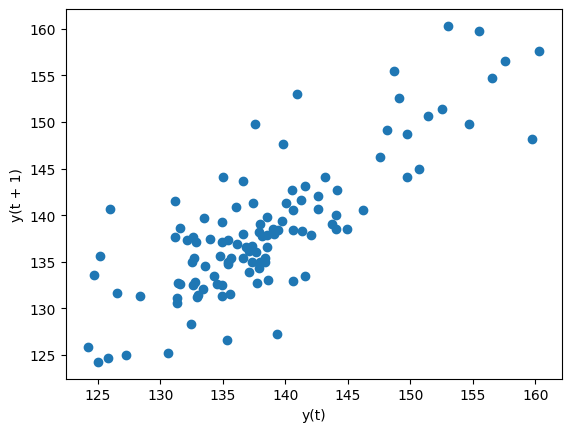

In [17]:
from pandas.plotting import lag_plot
lag_plot(dataset["Close"],lag=1)

Forecastability

Apen small- Forecastability is possible

Spen Small-Forecastability is possible

In [18]:
def ApEn(U, m, r):#U: The input time-series data (a list or NumPy array)
                #m: The embedding dimension. It defines the length of sequences of interest in the time series.
                #r: The tolerance threshold. This determines the similarity criterion for sequences in the time series.
    """Compute Aproximate entropy"""
    def _maxdist(x_i, x_j):#maximum distance between corresponding elements of two vectors 
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))

    N = len(U)
    return abs(_phi(m+1) - _phi(m))

In [19]:
import numpy as np
print(ApEn(dataset["Close"], m=2, r=0.2*np.std(dataset["Close"])))  

0.7466034620185362


C:\Users\Dell\AppData\Local\Temp\ipykernel_8076\3494220130.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]


In [20]:
def SampEn(U, m, r):
    """Compute Sample entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for j in range(len(x)) if i != j and _maxdist(x[i], x[j]) <= r]) for i in range(len(x))]
        return sum(C)

    N = len(U)
    return -np.log(_phi(m+1) / _phi(m))

In [21]:
print(SampEn(dataset["Close"], m=2, r=0.2*np.std(dataset["Close"])))

1.483668525145067


C:\Users\Dell\AppData\Local\Temp\ipykernel_8076\1392444303.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
